In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import nxviz as nv
import numpy as np
from operator import itemgetter

### Bipartite Graphs

- A graph that is partitioned into two sets
- Nodes are only connected to nodes in the other partition
- The previous examples are unipartite nodes

##### Example of Bipartite Graphs

<img src="../../images/bipartite_example.png" width="300" height="300">

Let's create a bipartite graph

In [2]:
# Initialize graph 
G = nx.Graph()

In [3]:
# Create some nodes
nodes_1 = np.arange(3)
nodes_2 = ["a", "b", "c", "d"]
# Add nodes to the initialized graph specifiying the partition
G.add_nodes_from(nodes_for_adding=nodes_1, bipartite="Products")
G.add_nodes_from(nodes_for_adding=nodes_2, bipartite="Customers")

Let us see how the nodes look like now:

In [4]:
G.nodes(data=True)

NodeDataView({0: {'bipartite': 'Products'}, 1: {'bipartite': 'Products'}, 2: {'bipartite': 'Products'}, 'a': {'bipartite': 'Customers'}, 'b': {'bipartite': 'Customers'}, 'c': {'bipartite': 'Customers'}, 'd': {'bipartite': 'Customers'}})

How to get the nodes for the in the partition customer?

In [5]:
nodes_customers = [n for n, d in G.nodes(data=True) if d['bipartite']=='Customers']
print(nodes_customers)

['a', 'b', 'c', 'd']


Let us look at some network data from github:

In [6]:
df_github = pd.read_csv("../../data/network/github/github.edges", skiprows=2)

In [7]:
df_github = df_github.astype(str)

In [8]:
users = "u" + df_github["1"]
projects = "p" + df_github["1.1"]

In [9]:
edges = list(zip(users, projects))

In [28]:
filtered_edges = edges[1000:1020]

In [29]:
users_fil = list(map(itemgetter(0), filtered_edges))
projs_fil = list(map(itemgetter(1), filtered_edges))

In [30]:
# Initialize the graph
G = nx.Graph()

In [31]:
# Add user nodes, use bipartite attribute
G.add_nodes_from(users_fil, bipartite='USERS')
#  Add project nodes
G.add_nodes_from(projs_fil, bipartite='PROJECTS')
# Add edges
G.add_edges_from(filtered_edges)

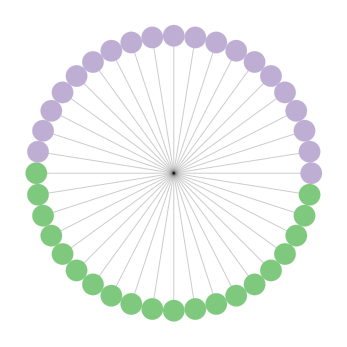

In [37]:
c = nv.CircosPlot(G, node_color='bipartite', node_grouping='bipartite')
c.draw()

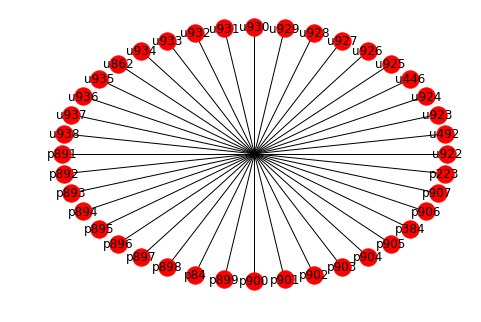

In [35]:
nx.draw_kamada_kawai(G, with_labels=True)

In [15]:
len(filtered_edges)

20